### Problem

We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.



In [1]:
class User:
    # Add constructor to add some properties/ attributes
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
    
    # It is supposed to return human-readable format which is useful for logging and 
    # display some information about the object
    def __str__(self):
        return "User(usernam={}, name={}, email={})".format(self.username, self.name, self.email)
    
    # The __repr__ function is supposed to return an “official” string 
    # representation of the object, which can be used to construct the object again.
    def __repr__(self):
        return self.__str__()
    

In [2]:
user1 = User('john', 'john doe', 'john.doe@yahoo.mail')

In [3]:
user1

User(usernam=john, name=john doe, email=john.doe@yahoo.mail)

In [4]:
# Some examples

aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

In [5]:
aakash.username, aakash.name, aakash.email

('aakash', 'Aakash Rai', 'aakash@example.com')

In [6]:
aakash

User(usernam=aakash, name=Aakash Rai, email=aakash@example.com)

In [7]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]

In [8]:
users

[User(usernam=aakash, name=Aakash Rai, email=aakash@example.com),
 User(usernam=biraj, name=Biraj Das, email=biraj@example.com),
 User(usernam=hemanth, name=Hemanth Jain, email=hemanth@example.com),
 User(usernam=jadhesh, name=Jadhesh Verma, email=jadhesh@example.com),
 User(usernam=siddhant, name=Siddhant Sinha, email=siddhant@example.com),
 User(usernam=sonaksh, name=Sonaksh Kumar, email=sonaksh@example.com),
 User(usernam=vishal, name=Vishal Goel, email=vishal@example.com)]





Here's a simple and easy solution to the problem: we store the User objects in a list sorted by usernames.

The various functions can be implemented as follows:

**Insert**: Loop through the list and add the new user at a position that keeps the list sorted.

**Find**: Loop through the list and find the user object with the username matching the query.

**Update**: Loop through the list, find the user object matching the query and update the details

**List**: Return the list of user objects.
We can use the fact usernames, which are are strings can be compared using the <, > and == operators in Python.

In [9]:
class UserDatabase:
    def __init__(self):
        self.users = []
        
    def insertUser(self, user):
        i = 0
        while i < len(self.users):
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)

        
    def findUser(self, username):
        for user in users:
            if user.username == username:
                return user

    def updateUser(self, user):
        target = self.findUser(user.username)
        target.name, target.email = user.name, user.email
        
    def list_all(self):
        return self.users

In [10]:
userDB = UserDatabase()

In [11]:
userDB.insertUser(aakash)

In [12]:
userDB.insertUser(hemanth)

In [13]:
userDB.insertUser(biraj)

In [14]:
userDB.list_all()

[User(usernam=aakash, name=Aakash Rai, email=aakash@example.com),
 User(usernam=biraj, name=Biraj Das, email=biraj@example.com),
 User(usernam=hemanth, name=Hemanth Jain, email=hemanth@example.com)]

In [15]:
userDB.findUser('aakash')

User(usernam=aakash, name=Aakash Rai, email=aakash@example.com)

In [16]:
userDB.updateUser(User('hemanth', 'Hemanth Kale', 'hemanth@kale.com'))

In [17]:
userDB.list_all()

[User(usernam=aakash, name=Aakash Rai, email=aakash@example.com),
 User(usernam=biraj, name=Biraj Das, email=biraj@example.com),
 User(usernam=hemanth, name=Hemanth Kale, email=hemanth@kale.com)]

###  Analyze the algorithm's complexity and identify inefficiencies

The operations `insert`, `find`, `update` involves iterating over a list of users, in the worst case, they may take up to `N` iterations to return a result, where `N` is the total number of users. `list_all` however, simply returns the existing internal list of users. 

Thus, the time complexities of the various operations are:

1. Insert: **O(N)**
2. Find: **O(N)**
3. Update: **O(N)**
4. List: **O(1)**

**Exercise:** Verify that the space complexity of each operation is **O(1)**.

Is this good enough? To get a sense how long each function might take if there are 100 million users on the platform, we can simply run an `for` or `while` loop on 10 million numbers.

In [18]:
%%time

for i in range(100000000):
    j = i+1

Wall time: 11.4 s


It takes almost 10 seconds to execute all the iterations in the above cell. 

* A 10-second delay for fetching user profiles will lead to a suboptimal users experience and may cause many users to stop using the platform altogether. 
* The 10-second processing time for each profile request will also significantly limit the number of users that can access the platform at a time or increase the cloud infrastructure costs for the company by millions of dollars.

As a senior backend engineer, you must come up with a more efficient data structure! Choosing the right data structure for the requirements at hand is an important skill. It's apparent that a sorted list of users might not be the best data structure to organize profile information for millions of users. 

### Let's apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree**:

<img src="https://i.imgur.com/lVqP63n.png" width="520">



It's called a tree because it vaguely like an inverted tree trunk with branches. 
* The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right). 
* Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
* The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

<img src="https://i.imgur.com/TZHMKJr.png" width="400">

## Balanced Binary Search Trees

<img src="https://i.imgur.com/Mqef5b3.png" width="520">

For our use case, we require the binary tree to have some additional properties:

1. **Keys and Values**: Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
2. **Binary Search Tree**: The *left subtree* of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the *right subtree* of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balanced Tree**: The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level. 

For a tree of height `k`, here's a list of the number of nodes at each level:

Level 0: `1`

Level 1: `2`

Level 2: `4` i.e. `2^2`

Level 3: `8` i.e. `2^3`

...

Level k-1: `2^(k-1)`

If the total number of nodes in the tree is `N`, then it follows that

```
N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
```


We can simplify this equation by adding `1` on each side:

```
N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

...

N + 1 = 2^(k-1) + 2^(k-1)

N + 1 = 2^k

k = log(N + 1) <= log(N) + 1 

```

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root. 

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

## Binary Tree

> **QUESTION **: Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple binary tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

Here's a simple class representing a node within a binary tree.

In [19]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.right = None
        self.left = None

In [20]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)


In [21]:
node0.left = node1
node0.right = node2

In [22]:
tree = node0

In [23]:
tree.key, tree.left.key, tree.right.key

(3, 4, 5)

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

**Exercise:** Create the following binary tree using the `TreeNode` class defined above.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [24]:
data = ((1,3,None),2,((None, 3, 4), 5, (6, 7, 8)))

In [25]:
isinstance(data, tuple)

True

In [26]:
def parse_tuple(data):
    print(data)
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [27]:
tree1 = parse_tuple(data)

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
(1, 3, None)
1
None
((None, 3, 4), 5, (6, 7, 8))
(None, 3, 4)
None
4
(6, 7, 8)
6
8


In [28]:
tree1.right.right.key

7

In [29]:
def disp(node, level=0):
    space = '\t'
    if node is None:
        print(level*space,'∅')
    if node.left is None and node.right is None:
        print(level*space, node.key)
        return
    else:
        disp(node.left, level+1)
        print(level*space, node.key)
        disp(node.right, level+1)

    

In [30]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key),'<')
    display_keys(node.left,space, level+1)  

In [31]:
display_keys(tree1)

			8
		7 <
			6
	5 <
			4
		3 <
			∅
2 <
		∅
	3 <
		1


In [32]:
def mydisplay(node):
    if node is None:
        print

## Traversing a Binary Tree

The following questions are frequently asked in coding interviews and assessments:

> **QUESTION 3**: Write a function to perform the _inorder_ traversal of a binary tree.

> **QUESTION 4**: Write a function to perform the _preorder_ traversal of a binary tree.

> **QUESTION 5**: Write a function to perform the _postorder_ traversal of a binary tree.

A *traversal* refers to the process of visiting each node of a tree exactly once. _Visiting a node_ generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys: 

### Inorder traversal



  1. Traverse the left subtree recursively inorder.
  2. Traverse the current node.
  3. Traverse the right subtree recursively inorder.


<img src="https://i.imgur.com/KCXpMA9.png" width="540">


### Preorder traversal

  1. Traverse the current node.
  2. Traverse the left subtree recursively preorder.
  3. Traverse the right subtree recursively preorder.
  
<img src="https://i.imgur.com/2xrMUWP.png" width="540">


Can you guess how **postorder** traversal works??


Here's an implementation of inorder traversal of a binary tree.

In [33]:
# Lets create a function for traversals:
def preorder(node):
    if node is None:
        return []
    return ([node.key] 
            + 
            inorder(node.left) 
            + 
            inorder(node.right))

In [34]:
def inorder(node):
    if node is None:
        return []
    return (inorder(node.left) 
            + 
            [node.key] 
            + 
            inorder(node.right))

In [35]:
def postorder(node):
    if node is None:
        return []
    return (
            inorder(node.left) 
            +
            inorder(node.right)
            +
            [node.key])

In [36]:
data = ((0,2,4), 8, (None, 9, 10))

In [37]:
nodes = parse_tuple(data)

((0, 2, 4), 8, (None, 9, 10))
(0, 2, 4)
0
4
(None, 9, 10)
None
10


In [38]:
display_keys(nodes)

		10
	9 <
		∅
8 <
		4
	2 <
		0


In [39]:
inorder(nodes)

[0, 2, 4, 8, 9, 10]

In [40]:
preorder(nodes)

[8, 0, 2, 4, 9, 10]

In [41]:
postorder(nodes)

[0, 2, 4, 9, 10, 8]

In [42]:
tree = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
(1, 3, None)
1
None
((None, 3, 4), 5, (6, 7, 8))
(None, 3, 4)
None
4
(6, 7, 8)
6
8


In [43]:
display_keys(tree)

			8
		7 <
			6
	5 <
			4
		3 <
			∅
2 <
		∅
	3 <
		1


In [44]:
inorder(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [45]:
[1, 3, 2, 3, 4, 5, 6, 7, 8]

[1, 3, 2, 3, 4, 5, 6, 7, 8]

## BFS vs DFS

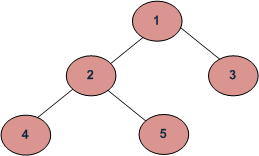

BFS and DFSs of above Tree

Breadth First Traversal : 1 2 3 4 5 or 1 2 3 5 4 or 1 3 2 4 5 or 1 3 2 5 4 

Depth First Traversals: 
      - Preorder Traversal : 1 2 4 5 3 
      - Inorder Traversal  :  4 2 5 1 3 
      - Postorder Traversal : 4 5 2 3 1

### Combining all in one class which we have learned os far,

In [46]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
    
    @staticmethod
    def parse_tuple(tup):
        if tup is None:
            node = None
        elif (isinstance(tup, tuple)) and (len(tup) == 3):
            node = TreeNode(tup[1])
            node.left = TreeNode.parse_tuple(tup[0])
            node.right = TreeNode.parse_tuple(tup[2])
        else:
            node = TreeNode(tup)
        return node
        
    def to_tuple(self):
        if self is None:
            return None
        elif self.left is None and self.right is None:
            return self.val
        else:
            return TreeNode.to_tuple(self.left), self.val, TreeNode.to_tuple(self.right)
        

    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def __repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def display(self, space='\t', level=0):
        if self is None:
            print((space*level)+'∅')
            return
        if self.left is None and self.right is None:
            print((space*level)+str(self.val))
            return
        
        TreeNode.display(self.right, space, level+1)
        print((space*level)+str(self.val))
        TreeNode.display(self.left, space, level+1)
        
        
    def height(self):
        return 0 if not self else 1+max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        return 0 if not self else 1+TreeNode.size(self.left) + TreeNode.size(self.right)
    
    def traverse_in_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + [self.val] + TreeNode.traverse_in_order(self.right))
    
    def traverse_pre_order(self):
        if self is None:
            return []
        return ([self.val] + TreeNode.traverse_in_order(self.left) + TreeNode.traverse_in_order(self.right))
    
    def traverse_post_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + TreeNode.traverse_in_order(self.right) + [self.val])
    


In [47]:
# Let's test some of the cases here

tupl = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
print('tuple',tupl)

tree_tupl = TreeNode.parse_tuple(tupl)
print('Tuple to tree', tree_tupl)

tree_tupl.to_tuple()

print('\n visualization ')
tree_tupl.display()

print('\n inorder',tree_tupl.traverse_in_order())


print('\n preorder', tree_tupl.traverse_pre_order())


print('\n postorder', tree_tupl.traverse_post_order())


tuple ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
Tuple to tree BinaryTree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))>

 visualization 
			8
		7
			6
	5
			4
		3
			∅
2
		∅
	3
		1

 inorder [1, 3, 2, 3, 4, 5, 6, 7, 8]

 preorder [2, 1, 3, 3, 4, 5, 6, 7, 8]

 postorder [1, 3, 3, 4, 5, 6, 7, 8, 2]


In [48]:

# Let's test some of the cases here

tupl = ((1,2,3),4,(5,6,7))
print('tuple',tupl)

tree_tupl = TreeNode.parse_tuple(tupl)
print('Tuple to tree', tree_tupl)

tree_tupl.to_tuple()

print('\n visualization ')
tree_tupl.display()

print('\n inorder',tree_tupl.traverse_in_order())


print('\n preorder', tree_tupl.traverse_pre_order())


print('\n postorder', tree_tupl.traverse_post_order())


tuple ((1, 2, 3), 4, (5, 6, 7))
Tuple to tree BinaryTree <((1, 2, 3), 4, (5, 6, 7))>

 visualization 
		7
	6
		5
4
		3
	2
		1

 inorder [1, 2, 3, 4, 5, 6, 7]

 preorder [4, 1, 2, 3, 5, 6, 7]

 postorder [1, 2, 3, 5, 6, 7, 4]


In [49]:
tree_tupl

BinaryTree <((1, 2, 3), 4, (5, 6, 7))>

In [50]:
def bst(node):
    if node is None:
        return True
    if node.val > bst(node.left) and node.val < bst(node.right):
        return True
    return False

In [51]:
tree_tupl.val

4

In [52]:
bst(tree_tupl)

False

In [53]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    
    is_bst_node = (is_bst_l and is_bst_r and 
              (max_l is None or node.val > max_l) and 
              (min_r is None or node.val < min_r))
    
    min_key = min(remove_none([min_l, node.val, min_r]))
    max_key = max(remove_none([max_l, node.val, max_r]))
    
    # print(node.key, min_key, max_key, is_bst_node)
        
    return is_bst_node, min_key, max_key

In [54]:
tree_tupl

BinaryTree <((1, 2, 3), 4, (5, 6, 7))>

In [55]:
is_bst(tree_tupl)

(True, 1, 7)

### Just added my logic which fails with none elements in tuple


In [56]:
def is_bst(node):
    node 
    if node is None:
        return True
    if node.left:
        # check if all node is less than node.val
        return node.val > is_bst(node.left)
    if node.right:
        # check if all node is greater than node.val
        return node.val > is_bst(node.right)
    if node.val:
        return node.val
    return False

    

In [64]:
tupl = ((2,1,None),4,(5,6,7))
print('tuple',tupl)

tree_tupl = TreeNode.parse_tuple(tupl)
print('Tuple to tree', tree_tupl)


tuple ((2, 1, None), 4, (5, 6, 7))
Tuple to tree BinaryTree <((2, 1, None), 4, (5, 6, 7))>


In [58]:
is_bst(tree_tupl)

True

In [98]:
class Node:
    # A utility function to create a new node
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None
 
# Iterative Method to print the
# height of a binary tree
 
 
def printLevelOrder(root):
    # Base Case
    if root is None:
        return
 
    # Create an empty queue
    # for level order traversal
    queue = []
 
    # Enqueue Root and initialize height
    queue.append(root)
 
    while(len(queue) > 0):
 
        # Print front of queue and
        # remove it from queue
        print(queue[0].data)
        node = queue.pop(0)
 
        # Enqueue left child
        if node.left is not None:
            queue.append(node.left)
 
        # Enqueue right child
        if node.right is not None:
            queue.append(node.right)
 
 
# Driver Program to test above function
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
 
print("Level Order Traversal of binary tree is -", root)
printLevelOrder(root)

Level Order Traversal of binary tree is - <__main__.Node object at 0x065588D0>
1
2
3
4
5
